In [15]:
#from signals import profit_series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

file_name = './historic_data/BTC-USD_300_9985.csv'
window = 50 # 1 day

In [16]:
df = pd.read_csv(file_name, index_col='Time', parse_dates=True, infer_datetime_format=True).sort_index()
#df.Close.plot(figsize=(15, 5), grid=True)
#df.head

In [31]:
def max_profit_given_risk(openval, high, low, close, risk_percent, delta_percent, fee_percent=0.25):
    """
    Determine the maximum profit that could be obtained within the given points without going below risk
    """
    # TODO: Use OHLC in here

    fee_fraction = abs(fee_percent / 100.0)
    risk_fraction = abs(risk_percent / 100.0)
    delta_fraction = abs(delta_percent / 100.0)
    
    initial = openval[0]
    sl = initial * (1.0 - risk_fraction)
    tp = initial * (1.0 + risk_fraction)
    risk_abs = initial * risk_fraction
    max_value = initial
    exit_value = initial
        
    for o, h, l, c in zip(openval, high, low, close):
        if l <= sl: # Hit stop loss
            exit_value = sl
            break
            
        if h > max_value: # Record new high
            max_value = h
            
        if (max_value >= tp) and l <= max_value * (1.0 - delta_fraction): # Close trade when price drops
            exit_value = c
            break
            
    fees = (initial + exit_value) * fee_fraction
    
    #print("Initial: {}, Stop Loss: {}, Take Profit: {}, Abs risk: {}".format(initial, sl, tp, risk_abs))
    #print("Gain: {}, Exit: {}, Max : {}, Fees: {}".format(exit_value - initial, exit_value, max_value, fees))
    
    return exit_value - initial, fees


def profit_series(df, change_per_pip, window=256, risk=1.0, delta=0.1):
    num = len(df.Close[:-window])
    tick = range(num)
    tp = []

    for idx in tick:
        o = df.Open[idx:idx+window]
        h = df.High[idx:idx+window]
        l = df.Low[idx:idx+window]
        c = df.Close[idx:idx+window]

        t, fees = max_profit_given_risk(o, h, l, c, risk_percent=risk, delta_percent=delta)
        pips = (t - fees) / float(change_per_pip)
        tp.append(pips)
    #tp.extend([0]*window)
    #df['Profit'] = tp
    return df, sum(tp)

In [34]:
risks = [0.01, 0.1, 0.2, 0.4, 1.0, 2.0, 4.0, 10.0, 20.0]
deltas = [0.01, 0.1, 1.0]
for risk in risks:
    for delta in deltas:
        _, pips= profit_series(df, 10, 128, risk, 0.1)
        print("Risk: {}, Delta: {} -> {} pips".format(risk, delta, pips))

Risk: 0.01, Delta: 0.01 -> -39896.6558147069 pips
Risk: 0.01, Delta: 0.1 -> -39896.6558147069 pips
Risk: 0.01, Delta: 1.0 -> -39896.6558147069 pips
Risk: 0.1, Delta: 0.01 -> -40793.20869281262 pips
Risk: 0.1, Delta: 0.1 -> -40793.20869281262 pips
Risk: 0.1, Delta: 1.0 -> -40793.20869281262 pips
Risk: 0.2, Delta: 0.01 -> -41356.53808070991 pips
Risk: 0.2, Delta: 0.1 -> -41356.53808070991 pips
Risk: 0.2, Delta: 1.0 -> -41356.53808070991 pips
Risk: 0.4, Delta: 0.01 -> -41888.46845787002 pips
Risk: 0.4, Delta: 0.1 -> -41888.46845787002 pips
Risk: 0.4, Delta: 1.0 -> -41888.46845787002 pips
Risk: 1.0, Delta: 0.01 -> -51774.076585649986 pips
Risk: 1.0, Delta: 0.1 -> -51774.076585649986 pips
Risk: 1.0, Delta: 1.0 -> -51774.076585649986 pips
Risk: 2.0, Delta: 0.01 -> -62484.83809184995 pips
Risk: 2.0, Delta: 0.1 -> -62484.83809184995 pips
Risk: 2.0, Delta: 1.0 -> -62484.83809184995 pips
Risk: 4.0, Delta: 0.01 -> -55335.9547127998 pips
Risk: 4.0, Delta: 0.1 -> -55335.9547127998 pips
Risk: 4.0, D

In [28]:
risks = [0.01,0.02, 0.04, 0.1, 0.2, 0.4, 1.0, 2.0, 4.0, 10.0]
for risk in risks:
    _, pips= profit_series(df, 10, 64, risk, 0.1)
    print("Risk %: {} -> {} pips", risk, pips)

Risk %: {} -> {} pips 0.01 -3.9581148652499607
Risk %: {} -> {} pips 0.02 -4.035534730500012
Risk %: {} -> {} pips 0.04 -4.190374460999932
Risk %: {} -> {} pips 0.1 -4.6548936524999664
Risk %: {} -> {} pips 0.2 -5.429092305000024
Risk %: {} -> {} pips 0.4 -0.6128850000000696
Risk %: {} -> {} pips 1.0 -1.0687425000000403
Risk %: {} -> {} pips 2.0 -3.8806950000000002
Risk %: {} -> {} pips 4.0 -3.8806950000000002
Risk %: {} -> {} pips 10.0 -3.8806950000000002


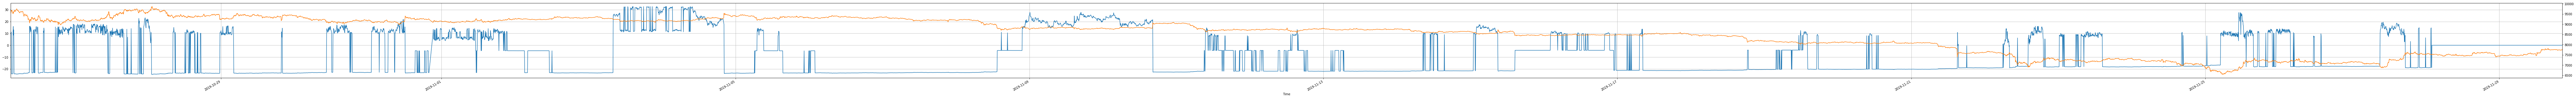

In [25]:
df.Profit.plot(figsize=(150, 5))
df.Close.plot(figsize=(150, 5), secondary_y=True, grid=True)

In [ ]:
risk_fraction = abs(1.0 / 100.0)   
initial = 1000
sl = initial * (1.0 - risk_fraction)
print(sl)

Next step: Use code from Udemy to generate to buy signals and to determine

In [ ]:
import talib as ta

In [ ]:
# 2. Bollinger Bands BB(20,2) Calculation and Chart

# Technical Indicator Calculation
df['upper'], df['middle'], df['lower'] = ta.BBANDS(np.asarray(df['Close']),
                                                     timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
# Technical Indicator Chart
%matplotlib notebook

fig1, ax = plt.subplots()
ax.plot(df['Close'])
ax.plot(df['upper'], linestyle='--')
ax.plot(df['middle'], linestyle='--')
ax.plot(df['lower'], linestyle='--')
plt.title('SPY Close Prices & Bollinger Bands BB(20,2)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# 3. Bands Crossover Trading Signals
# Previous Periods Data (avoid back-testing bias)
df['Close(-1)'] = df['Close'].shift(1)
df['lower(-1)'] = df['lower'].shift(1)
df['upper(-1)'] = df['upper'].shift(1)
df['Close(-2)'] = df['Close'].shift(2)
df['lower(-2)'] = df['lower'].shift(2)
df['upper(-2)'] = df['upper'].shift(2)
# Generate Trading Signals (buy=1 , sell=-1, do nothing=0)
df['bbsig'] = 0
bbsig = 0
for i, r in enumerate(df.iterrows()):
    if r[1]['Close(-2)'] < r[1]['lower(-2)'] and r[1]['Close(-1)'] > r[1]['lower(-1)']:
        bbsig = 1
    #elif r[1]['Close(-2)'] > r[1]['upper(-2)'] and r[1]['Close(-1)'] < r[1]['upper(-1)']:
    #    bbsig = -1
    else:
        bbsig = 0
    df.loc[df.index[i],'bbsig'] = bbsig
# Trading Signals Chart
fig2, ax = plt.subplots(2, sharex=True)
ax[0].plot(df['Close'])
ax[0].plot(df['upper'], linestyle='--')
ax[0].plot(df['middle'], linestyle='--')
ax[0].plot(df['lower'], linestyle='--')
ax[0].legend(loc='upper left')
ax[1].plot(df['bbsig'], marker='o', linestyle='')
ax[1].legend(loc='upper left')
plt.suptitle('SPY Close Prices & Bollinger Bands BB(20,2)')
plt.show()

In [ ]:
df.Profit.plot(figsize=(15, 5))
df.bbsig.plot(figsize=(15, 5), secondary_y=True, grid=True)

In [ ]:
(df.Profit * df.bbsig).sum()